In [1]:
from fastai.data.all import *
from fastai.vision.all import *
from fastai.vision.all import *
from pathlib import Path
import torch
torch.cuda.set_device(3)

In [2]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [3]:
datapath = Path(os.getcwd())/"Labeled_dataset"
print(datapath)

/raid10/active_users/adijat/ml/Labeled_dataset


In [4]:
Path(os.getcwd())/"Labeled_dataset"

Path('/raid10/active_users/adijat/ml/Labeled_dataset')

In [5]:
Path(os.getcwd())/"Labeled_dataset/sugarbeet_stage_1"
Path(os.getcwd())/"Labeled_dataset/sugarbeet_stage_2"
Path(os.getcwd())/"Labeled_dataset/Apple"

Path('/raid10/active_users/adijat/ml/Labeled_dataset/Apple')

In [6]:
import os
from PIL import Image

data_path = "Labeled_dataset"
sugarbeet_stage_1_path = os.path.join(data_path, "sugarbeet_stage_1")
sugarbeet_stage_2_path = os.path.join(data_path, "sugarbeet_stage_2")
apple_path = os.path.join(data_path, "Apple")

# Loop through all the files in the Sugarbeet-Stage1 directory
print("Files in sugarbeet_stage_1 directory:")
for filename in os.listdir(sugarbeet_stage_1_path):
    if filename.endswith(".jpg"):
        print(filename)

# Loop through all the files in the Sugarbeet-Stage2 directory
print("Files in sugarbeet_stage_2 directory:")
for filename in os.listdir(sugarbeet_stage_2_path):
    if filename.endswith(".jpg"):
        print(filename)

# Loop through all the files in the Apple directory
print("Files in Apple directory:")
for filename in os.listdir(apple_path):
    if filename.endswith(".JPG"):
        print(filename)


Files in sugarbeet_stage_1 directory:
image-0408.jpg
image-01313.jpg
image-0128.jpg
image-0853.jpg
image-00218.jpg
image-048.jpg
image-01517.jpg
image-00616.jpg
image-0105.jpg
image-0185.jpg
image-0567.jpg
image-107.jpg
image-1048.jpg
image-05710.jpg
image-0156.jpg
image-0129.jpg
image-070.jpg
image-1302.jpg
image-106.jpg
image-0543.jpg
image-0582.jpg
image-02611.jpg
image-05512.jpg
image-0546.jpg
image-0076.jpg
image-01418.jpg
image-0416.jpg
image-0628.jpg
image-099.jpg
image-0704.jpg
image-0592.jpg
image-092.jpg
image-0918.jpg
image-0025.jpg
image-0057.jpg
image-0054.jpg
image-0052.jpg
image-081.jpg
image-0122.jpg
image-0903.jpg
image-0629.jpg
image-1065.jpg
image-0513.jpg
image-0823.jpg
image-01712.jpg
image-0055.jpg
image-0952.jpg
image-0893.jpg
image-0804.jpg
image-073.jpg
image-0499.jpg
image-0762.jpg
image-0905.jpg
image-1047.jpg
image-053.jpg
image-0394.jpg
image-1232.jpg
image-04611.jpg
image-016.jpg
image-1104.jpg
image-01416.jpg
image-0423.jpg
image-0429.jpg
image-1043.jpg
i

In [7]:
import os
from PIL import Image

image_path = "Labeled_dataset"
sugarbeet_stage_1_path = os.path.join(image_path, "sugarbeet_stage_1")
sugarbeet_stage_2_path = os.path.join(image_path, "sugarbeet_stage_2")
Apple_path = os.path.join(image_path, "Apple")

# Loop through all the files in the directory
for filename in os.listdir(Apple_path):
    # Check if the file is an image file
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".JPG"):
        # Open the image file
        Apple_img = Image.open(os.path.join(Apple_path, filename))
        # Do something with the image
        print(Apple_img.size)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

In [8]:
from fastai.vision.all import *

# Define path to image dataset
path = Path("Labeled_dataset")

# Define a function to get the label of an image based on its path
def get_label(file_path):
    return file_path.parent.name

# Define a DataBlock for loading and transforming the images
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=get_label,
    item_tfms=[Resize(224)],
    batch_tfms=[*aug_transforms()]
)

# Create dataloaders from the data
dls = data.dataloaders(path)


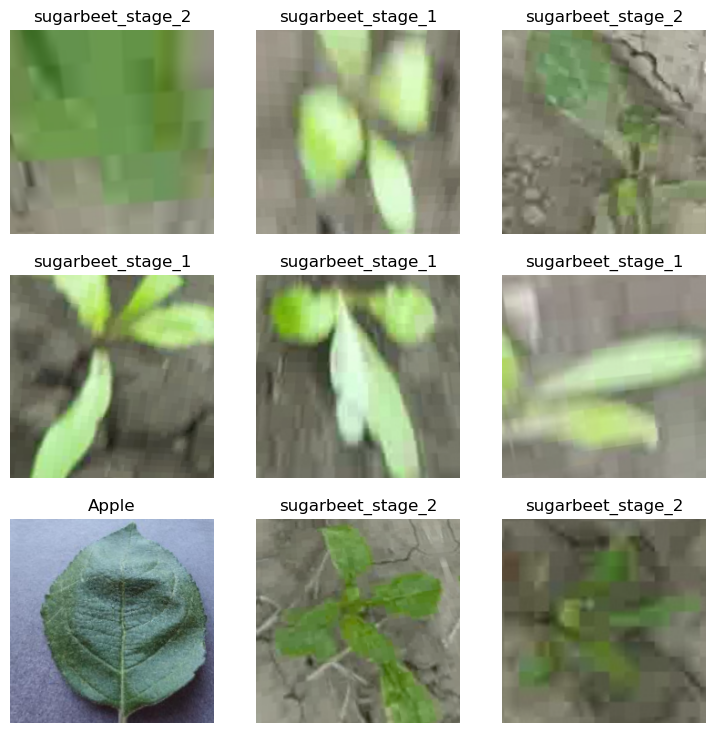

In [10]:
dls = data.dataloaders(Path("Labeled_dataset"))
dls.show_batch()

In [11]:
# Load a pre-trained model
learn = vision_learner(dls, resnet50, metrics=accuracy)

/raid10/active_users/adijat/miniconda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/raid10/active_users/adijat/miniconda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
# Fine-tune the model
learn.fine_tune(10)

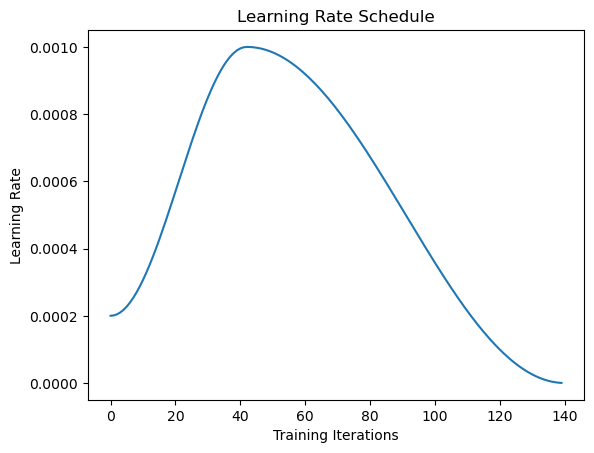

In [13]:
import matplotlib.pyplot as plt

# Get the learning rate values
lrs = learn.recorder.lrs

# Plot the learning rate schedule
plt.plot(range(len(lrs)), lrs)
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()

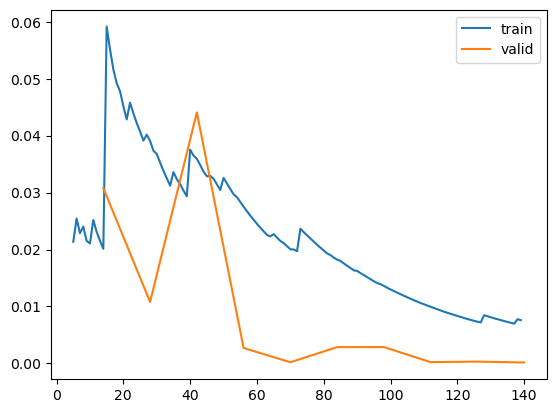

In [14]:
import matplotlib.pyplot as plt

# Create a recorder object
recorder = learn.recorder

# Plot the validation and training losses
recorder.plot_loss()


In [15]:
# Evaluate the model
acc = learn.validate()[1]
print(f"Accuracy: {acc}")

Accuracy: 1.0


In [16]:
Path(os.getcwd())/"unlabeled"

Path('/raid10/active_users/adijat/ml/unlabeled')

In [17]:
Path(os.getcwd())/"unlabeled"

Path('/raid10/active_users/adijat/ml/unlabeled')

In [18]:
import os

data_path = os.path.join(os.getcwd(), "unlabeled")

image_files = [file for file in os.listdir(data_path) if file.lower().endswith((".jpg", ".jpeg"))]

print("Files in unlabeled directory:")
print(image_files)


Files in unlabeled directory:
['7bf79f19-bb50-44cd-b8d5-0b4d6794689b___RS_HL 7989.jpg', 'dji-55-image-12329.jpg', 'dji-55-image-11012.jpg', 'dji-55-image-11218.jpg', 'dji-55-image-064.jpg', '8c43ceb4-000b-441b-887f-ef495da381e2___RS_HL 7864.jpg', 'dji-55-image-0019.jpg', 'f76ff409-9723-4b89-83f9-1ff33edaffbc___RS_HL 7331.jpg', 'dji-55-image-0595.jpg', '65a6866e-a6ea-46d5-a8ca-413f98cd8b7a___RS_HL 5817.jpg', 'e3a3c4f3-12b0-49f2-a14c-c73cdc542e74___RS_HL 7773.jpg', 'dji-55-image-0108.jpg', '3d075f90-7002-4c45-abc0-4f35ee49aa79___RS_HL 6272.jpg', 'dji-55-image-12811.jpg', '3f9788c1-8456-453f-b1c2-5cc66ba714a6___RS_HL 7635.jpg', 'dji-55-image-0783.jpg', 'd57beb14-b60a-431f-8a41-17a342cba57a___RS_HL 5737.jpg', 'image-01311.jpg', '6fe99b1c-d402-4756-a21b-ff964b999adb___RS_HL 6253.jpg', '2345cf40-76a9-4bb3-9e7c-8d185dd41905___RS_HL 8123.jpg', 'dji-55-image-03612.jpg', '5eea6ca0-2fb5-4382-bd60-2893d4367bc3___RS_HL 6007.jpg', '17af118c-a4aa-49c6-b31b-b7de49b58dfa___RS_HL 7557.jpg', 'dji-55-imag

In [19]:
import os
from PIL import Image

image_path = "unlabeled"

# Loop through all the files in the directory
for filename in os.listdir(image_path):
    # Check if the file is an image file
    if filename.endswith((".jpg", ".JPG")):
        # Open the image file
        image_file = os.path.join(image_path, filename)
        with Image.open(image_file) as img:
            # Do something with the image
            print(img.size)


(256, 256)
(307, 311)
(268, 270)
(112, 122)
(258, 316)
(256, 256)
(340, 346)
(256, 256)
(285, 256)
(256, 256)
(256, 256)
(288, 284)
(256, 256)
(263, 260)
(256, 256)
(234, 219)
(256, 256)
(129, 118)
(256, 256)
(256, 256)
(345, 252)
(256, 256)
(256, 256)
(247, 162)
(256, 256)
(304, 314)
(256, 256)
(256, 256)
(185, 220)
(256, 256)
(256, 256)
(240, 231)
(256, 256)
(256, 256)
(288, 230)
(295, 281)
(290, 224)
(322, 289)
(256, 256)
(190, 152)
(371, 301)
(256, 256)
(41, 95)
(256, 256)
(213, 305)
(256, 256)
(261, 220)
(303, 292)
(235, 192)
(256, 256)
(256, 256)
(302, 281)
(84, 79)
(400, 308)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(243, 246)
(256, 256)
(184, 231)
(256, 256)
(245, 243)
(256, 256)
(355, 330)
(105, 114)
(248, 248)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(226, 211)
(279, 205)
(226, 220)
(256, 256)
(218, 170)
(251, 266)
(256, 256)
(201, 251)
(192, 200)
(256, 256)
(256, 256)
(256, 256)
(216, 263)
(165, 148)
(256, 256)
(155, 215)
(21

In [20]:
from fastai.vision.all import *

unlabeled_path = Path("unlabeled")

# Define a DataBlock for loading the unlabeled images
unlabeled_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,

    get_y=noop,  # No labels for unlabeled data
    item_tfms=[Resize(224)]
)

# Create a dataloader for the unlabeled data
unlabeled_dls = unlabeled_data.dataloaders(unlabeled_path, bs=64)


In [22]:
#Select a batch of unlabeled samples
batch_size = 100  # Set the desired batch size
unlabeled_samples = unlabeled_dls.train.items[:batch_size]

In [30]:
# Print the selected unlabeled samples
print(unlabeled_samples)

# Check the number of samples
print(len(unlabeled_samples))

[Path('unlabeled/99997741-0ae6-4f14-a8e9-43b61a86ecc5___RS_HL 6294.jpg'), Path('unlabeled/dji-55-image-07917.jpg'), Path('unlabeled/dji-55-image-0014.jpg'), Path('unlabeled/image-0579.jpg'), Path('unlabeled/dji-55-image-0424.jpg'), Path('unlabeled/dji-55-image-08911.jpg'), Path('unlabeled/af00bd10-d7ef-4076-90c8-28f2d6ff6aa2___RS_HL 8188.jpg'), Path('unlabeled/41628932-5547-443e-8659-ed8ad6be820e___RS_HL 5711.jpg'), Path('unlabeled/image-0438.jpg'), Path('unlabeled/dji-55-image-10619.jpg'), Path('unlabeled/dji-55-image-0407.jpg'), Path('unlabeled/dji-55-image-1509.jpg'), Path('unlabeled/dji-55-image-0157.jpg'), Path('unlabeled/dji-55-image-1015.jpg'), Path('unlabeled/dji-55-image-12918.jpg'), Path('unlabeled/dji-55-image-1153.jpg'), Path('unlabeled/23b5f9bf-18d8-43d3-a289-6398a7abde91___RS_HL 7914.jpg'), Path('unlabeled/image-0768.jpg'), Path('unlabeled/d57f5f33-d8e9-4c40-80ad-c2875743f781___RS_HL 5726.jpg'), Path('unlabeled/dji-55-image-07315.jpg'), Path('unlabeled/dji-55-image-0379.j

In [36]:
# Specify the file path where you want to save the model
model_path = 'model.batch'

# Save the model
learn.save(model_path)


Path('models/model.batch.pth')

In [39]:
learn.load(model_path)

In [50]:
import os
from PIL import Image
import torch
from torchvision import transforms

unlabeled_data_path = "unlabeled"  # Path to the directory containing unlabeled images

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to match the input size of your model
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Define a threshold for confidence
confidence_threshold = 0.5

# Initialize a list to store the uncertain samples
uncertain_samples = []

# Iterate over the files in the folder
for file_name in os.listdir(unlabeled_data_path):
    # Construct the path to the file
    file_path = os.path.join(unlabeled_data_path, file_name)
    
    # Check if the path is a file and has a valid image file extension
    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        continue
    
    # Load and preprocess the image
    try:
        img = Image.open(file_path)
        img = transform(img)
    except Exception as e:
        print(f"Error opening image file: {file_path}")
        continue
    
    # Add an extra dimension to match the batch size expected by the model
    img = img.unsqueeze(0)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Disable gradient calculation since we're only doing inference
    with torch.no_grad():
        # Pass the preprocessed image through the model
        prediction = model(img)
    
    # Convert the prediction to probabilities using softmax
    probabilities = torch.softmax(prediction, dim=1)
    
    # Get the maximum predicted probability and its corresponding class
    max_prob, predicted_class = torch.max(probabilities, dim=1)
    
    # Check if the maximum predicted probability is below the confidence threshold
    if max_prob.item() < confidence_threshold:
        uncertain_samples.append(file_path)

# Print the uncertain samples
for sample in uncertain_samples:
    print(sample)


unlabeled/7bf79f19-bb50-44cd-b8d5-0b4d6794689b___RS_HL 7989.jpg
unlabeled/dji-55-image-12329.jpg
unlabeled/dji-55-image-11012.jpg
unlabeled/dji-55-image-11218.jpg
unlabeled/dji-55-image-064.jpg
unlabeled/8c43ceb4-000b-441b-887f-ef495da381e2___RS_HL 7864.jpg
unlabeled/dji-55-image-0019.jpg
unlabeled/f76ff409-9723-4b89-83f9-1ff33edaffbc___RS_HL 7331.jpg
unlabeled/dji-55-image-0595.jpg
unlabeled/65a6866e-a6ea-46d5-a8ca-413f98cd8b7a___RS_HL 5817.jpg
unlabeled/e3a3c4f3-12b0-49f2-a14c-c73cdc542e74___RS_HL 7773.jpg
unlabeled/dji-55-image-0108.jpg
unlabeled/3d075f90-7002-4c45-abc0-4f35ee49aa79___RS_HL 6272.jpg
unlabeled/dji-55-image-12811.jpg
unlabeled/3f9788c1-8456-453f-b1c2-5cc66ba714a6___RS_HL 7635.jpg
unlabeled/dji-55-image-0783.jpg
unlabeled/image-01311.jpg
unlabeled/6fe99b1c-d402-4756-a21b-ff964b999adb___RS_HL 6253.jpg
unlabeled/2345cf40-76a9-4bb3-9e7c-8d185dd41905___RS_HL 8123.jpg
unlabeled/dji-55-image-03612.jpg
unlabeled/5eea6ca0-2fb5-4382-bd60-2893d4367bc3___RS_HL 6007.jpg
unlabeled/

In [51]:
labeled_data_path = "Labeled_dataset"  # Path to the directory containing labeled images

# Iterate over the uncertain samples
for sample_path in uncertain_samples:
    # Ask the user for the correct label
    correct_label = input(f"Enter the correct label for sample {sample_path}: ")
    
    # Create the subfolder path for the correct label
    correct_label_path = os.path.join(labeled_data_path, correct_label)
    
    # Create the subfolder if it doesn't exist
    os.makedirs(correct_label_path, exist_ok=True)
    
    # Move the sample to the correct label subfolder
    sample_filename = os.path.basename(sample_path)
    new_sample_path = os.path.join(correct_label_path, sample_filename)
    os.rename(sample_path, new_sample_path)

print("Annotation completed!")


Enter the correct label for sample unlabeled/7bf79f19-bb50-44cd-b8d5-0b4d6794689b___RS_HL 7989.jpg: Apple
Enter the correct label for sample unlabeled/dji-55-image-12329.jpg: sugarbeet_stage_2
Enter the correct label for sample unlabeled/dji-55-image-11012.jpg: sugarbeet_stage_2
Enter the correct label for sample unlabeled/dji-55-image-11218.jpg: sugarbeet_stage_2
Enter the correct label for sample unlabeled/dji-55-image-064.jpg: sugarbeet_stage_2
Enter the correct label for sample unlabeled/8c43ceb4-000b-441b-887f-ef495da381e2___RS_HL 7864.jpg: Apple
Enter the correct label for sample unlabeled/dji-55-image-0019.jpg: sugarbeet_stage_2
Enter the correct label for sample unlabeled/f76ff409-9723-4b89-83f9-1ff33edaffbc___RS_HL 7331.jpg: Apple
Enter the correct label for sample unlabeled/dji-55-image-0595.jpg: sugarbeet_stage_2
Enter the correct label for sample unlabeled/65a6866e-a6ea-46d5-a8ca-413f98cd8b7a___RS_HL 5817.jpg: Apple
Enter the correct label for sample unlabeled/e3a3c4f3-12b0

KeyboardInterrupt: Interrupted by user

Enter the correct label for sample unlabeled/image-0197.jpg: sugarbeet_stage_1


In [53]:
from fastai.vision.all import *

# Define path to image dataset
path = Path("Labeled_dataset")

# Define a function to get the label of an image based on its path
def get_label(file_path):
    return file_path.parent.name

# Define a DataBlock for loading and transforming the images
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=get_label,
    item_tfms=[Resize(224)],
    batch_tfms=[*aug_transforms()]
)

# Create dataloaders from the data
dls = data.dataloaders(path)


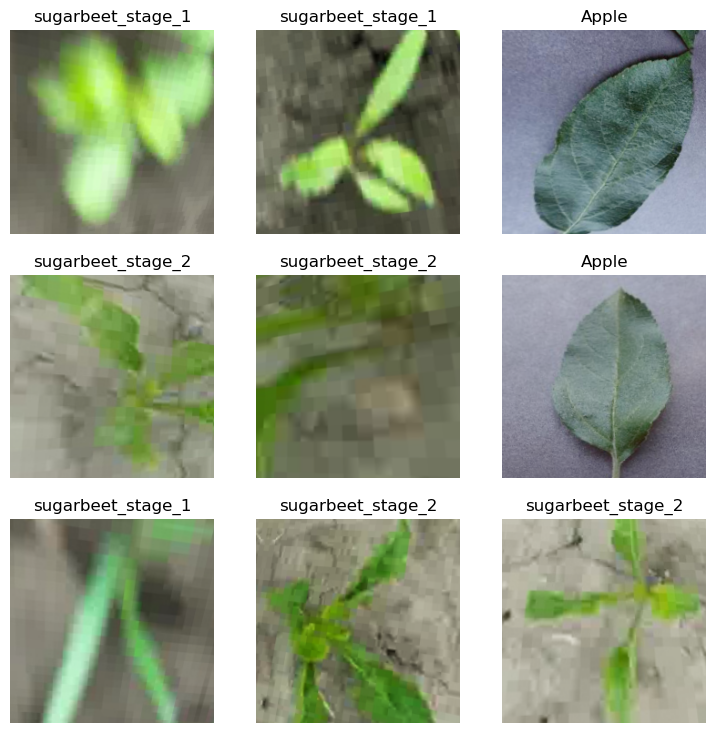

In [57]:
dls = data.dataloaders(Path("Labeled_dataset"))
dls.show_batch()

In [65]:
from fastai.vision.all import *

learn = cnn_learner(dls, resnet50, metrics=accuracy)


/raid10/active_users/adijat/miniconda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [67]:
learn.load('model.batch')

In [68]:
learn.fine_tune(10)  # Train for 10 epochs

In [69]:
valid_loss, valid_acc = learn.validate()
print(f"Validation Loss: {valid_loss}, Validation Accuracy: {valid_acc}")


Validation Loss: 0.0811242088675499, Validation Accuracy: 0.9966996908187866


In [71]:
learn.save('retrained_model')

Path('models/retrained_model.pth')

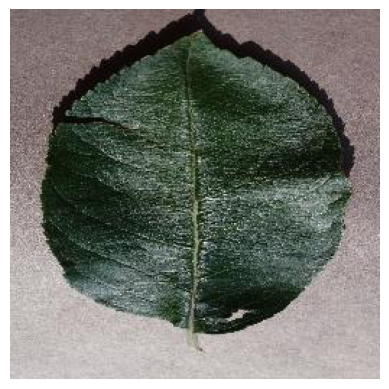

Prediction: Apple


In [82]:
import PIL

# Define the path to your new image
new_image_path = "unlabeled/14e92721-00a0-4696-9392-d3f633082454___RS_HL 5654.jpg"

# Load the image using the PIL library
img = PIL.Image.open(new_image_path)

# Show the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make a prediction using the trained model
pred, _, _ = learn.predict(new_image_path)

# Print the predicted label
print(f"Prediction: {pred}")


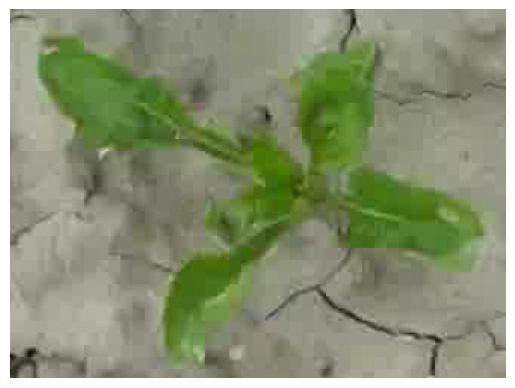

Prediction: sugarbeet_stage_2


In [83]:
import PIL

# Define the path to your new image
new_image_path = "unlabeled/dji-55-image-00612.jpg"

# Load the image using the PIL library
img = PIL.Image.open(new_image_path)

# Show the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make a prediction using the trained model
pred, _, _ = learn.predict(new_image_path)

# Print the predicted label
print(f"Prediction: {pred}")


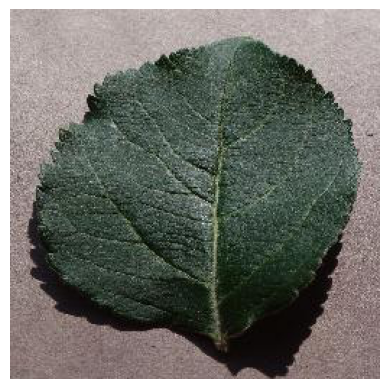

Prediction for d57beb14-b60a-431f-8a41-17a342cba57a___RS_HL 5737.jpg: Apple


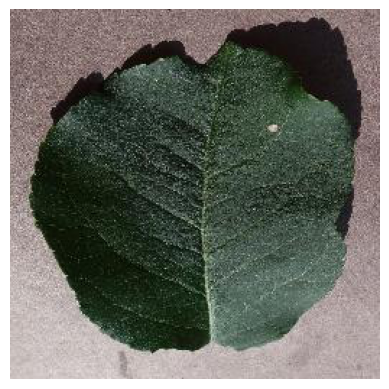

Prediction for b06260e3-9149-43c1-ab1d-2a592ee2b7fc___RS_HL 5825.jpg: Apple


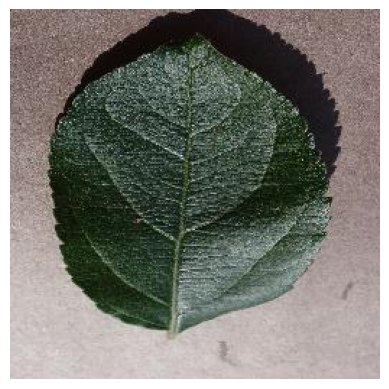

Prediction for 7bf0ddc7-fa85-442b-859b-486b087a4641___RS_HL 5837.jpg: Apple


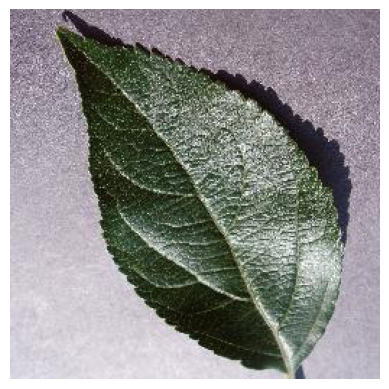

Prediction for 990838f4-b976-45bb-859d-95de901acc8c___RS_HL 7365.jpg: Apple


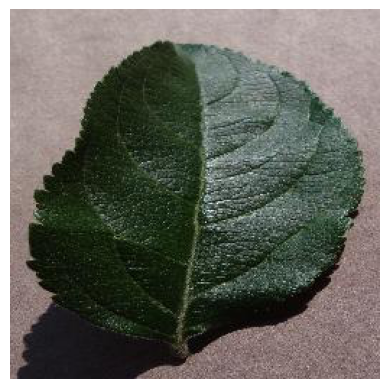

Prediction for 49b6b50f-7c76-4c31-9e33-b5ae8d22264c___RS_HL 5882.jpg: Apple


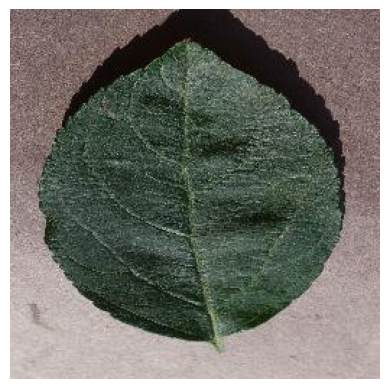

Prediction for bb575ddf-8661-4bcc-82ee-25050ba543b7___RS_HL 5807.jpg: Apple


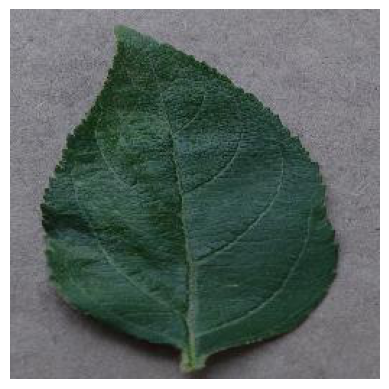

Prediction for 5ade6606-f111-4074-a533-30f215297f08___RS_HL 6282.jpg: Apple


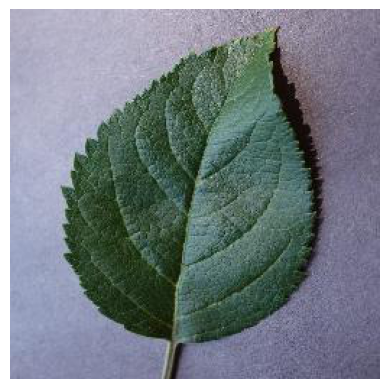

Prediction for 7c1289d0-4fe5-478c-a9f4-5d94b461d7bf___RS_HL 7970.jpg: Apple


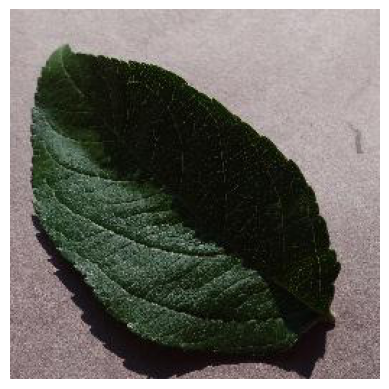

Prediction for b3a6e935-5855-48b2-905a-e3d6e1806e94___RS_HL 5688.jpg: Apple


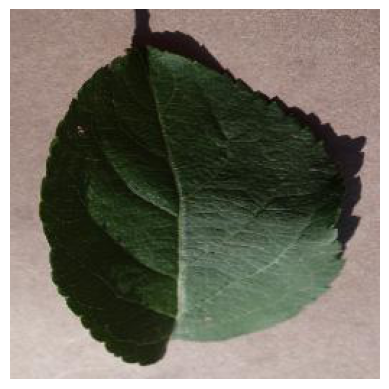

Prediction for aa701c91-01d7-44bf-a1df-b4d8ca4fbce0___RS_HL 5715.jpg: Apple


In [87]:
import os
import PIL

# Define the path to your unlabeled data directory
unlabeled_data_dir = 'unlabeled'

# Get a list of image files in the unlabeled data directory, excluding the .ipynb_checkpoints directory
image_files = [file_name for file_name in os.listdir(unlabeled_data_dir) if not file_name.startswith('.ipynb_checkpoints')]

# Select the first 10 images for prediction
image_files = image_files[:10]

# Iterate over the image files
for file_name in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(unlabeled_data_dir, file_name)

    # Load the image using the PIL library
    img = PIL.Image.open(image_path)

    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Make a prediction using the trained model
    pred, _, _ = learn.predict(image_path)

    # Print the predicted label
    print(f"Prediction for {file_name}: {pred}")


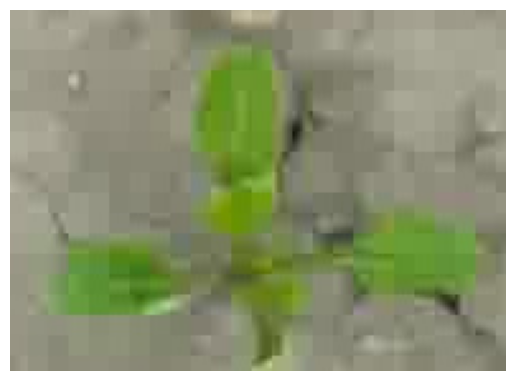

Prediction for dji-55-image-12810.jpg: sugarbeet_stage_2


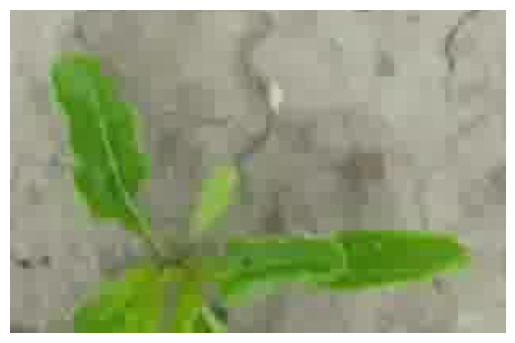

Prediction for dji-55-image-1178.jpg: sugarbeet_stage_2


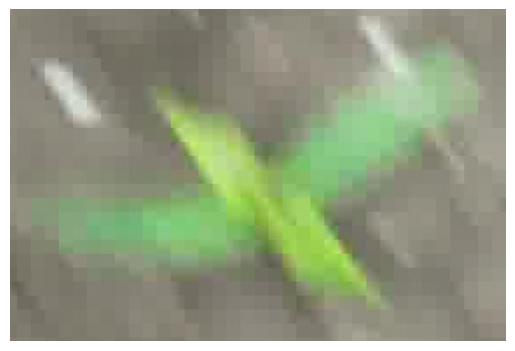

Prediction for image-0898.jpg: sugarbeet_stage_1


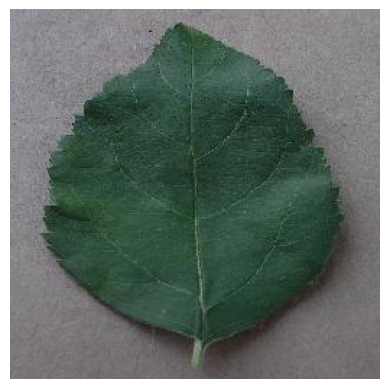

Prediction for 5ceefac5-fa4f-4b5c-b270-3a945fc89ec0___RS_HL 6191.jpg: Apple


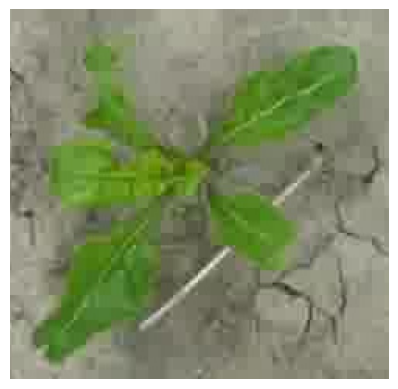

Prediction for dji-55-image-043.jpg: sugarbeet_stage_2


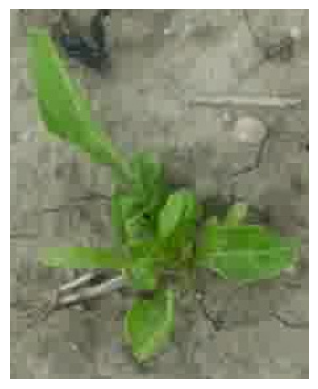

Prediction for dji-55-image-08127.jpg: sugarbeet_stage_2


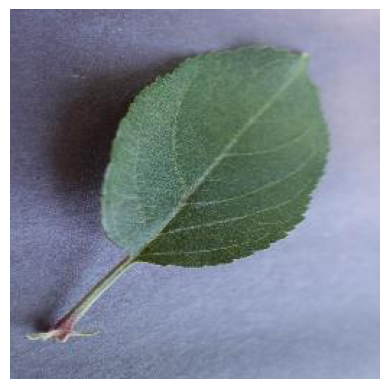

Prediction for 2fbd9205-be67-4f43-be2a-93a8def382a6___RS_HL 7680.jpg: Apple


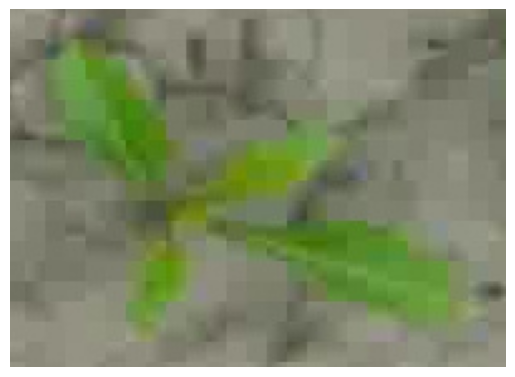

Prediction for dji-55-image-1507.jpg: sugarbeet_stage_2


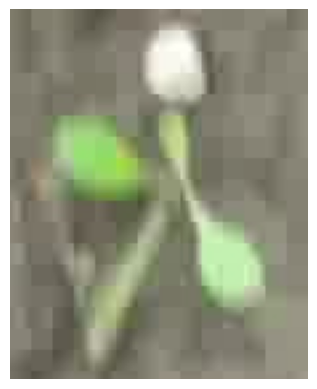

Prediction for image-0119.jpg: sugarbeet_stage_1


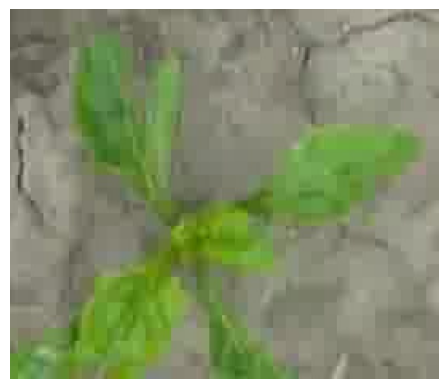

Prediction for dji-55-image-098.jpg: sugarbeet_stage_2


In [88]:
import os
import PIL

# Define the path to your unlabeled data directory
unlabeled_data_dir = 'unlabeled'

# Get a list of image files in the unlabeled data directory, excluding the .ipynb_checkpoints directory
image_files = [file_name for file_name in os.listdir(unlabeled_data_dir) if not file_name.startswith('.ipynb_checkpoints')]

# Select the last 10 images for prediction
image_files = image_files[-10:]

# Iterate over the image files
for file_name in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(unlabeled_data_dir, file_name)

    # Load the image using the PIL library
    img = PIL.Image.open(image_path)

    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Make a prediction using the trained model
    pred, _, _ = learn.predict(image_path)

    # Print the predicted label
    print(f"Prediction for {file_name}: {pred}")
